Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from geopy import distance
import pandas_profiling

### 1. Загрузите датасет taxi.csv

In [2]:
data = pd.read_csv('taxi.csv')
data.head(10)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.000,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


### 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.

In [3]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Далее я смотрел какие уникальные значения в категориальных данных и нет ли там отклонений

In [5]:
data.weekday_key.unique()

array([5, 6, 2, 4, 3, 1, 0], dtype=int64)

In [6]:
data.offer_class_group.unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

In [7]:
data.ride_type_desc.unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

In [8]:
data.driver_response.unique()

array([0, 1], dtype=int64)

In [9]:
data.hour_key.unique()

array([20, 14,  6, 16, 15, 11,  7, 10, 12,  8,  9, 21, 17, 23, 13, 18,  5,
       19, 22,  0,  2,  3,  1,  4], dtype=int64)

In [10]:
data.driver_response.unique()

array([0, 1], dtype=int64)

Проверяю на дубликаты

In [11]:
#проверяю на дупликаты

data[data.duplicated(subset = ['offer_gk'], keep = False)]

#проверял 'offer_gk' и весь датасет. Дубликатов нет.

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response


Вопросы вызывают признаки: 
1)
-driver_latitude	
-driver_longitude
-origin_order_latitude
-origin_order_longitude

Их min значения равны -1: 
    Широта может быть от 0 (экватор) до 90 градусов (полюс), северная или южная соответственно.
    Долгота - от 0 до 180 градусов (западная или восточная).

Я предпологаю, что это не ошибка, а результат предобратотки. В исходном датасете на этих местах могди быть пропуски данных или выбросы, а "-1" это маркер.
    
2) 
-distance_km

так же min значение -1. Думаю, можно рассичитать дистанцию, если не пропусков признаков в координатах.

3)
-duration_min

Тут как min значния, так и 25 квартиль равны -1. Можно поробовать рассчитать вероятное время, как среднее по нескольким окресным значениям дистанции, то есть для дистанции "9.800" найти в её окресности несколько (скажем 3) duration_min и вычислить её среднее. Однако, я полагаю, что для автодорог так считать не лучшый способ, поскольку много факторов влияющих на время: пробки, аварии, перекрытия дорог, светофоры, время суток и т.д. 
Я так же предпологаю, что все поездки совершаются в пределах одной области (города,округа и т.п.)
По этому, я выбрал способ заполнения duration_min медианным значением. 


### 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

Посмотрим на данные внимательнее.

In [12]:
list_a = ['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude']

b = len(data)

sum_percent = 0

for a in list_a:
    percent = (len(data[data[a] == -1]) / b) * 100
    sum_percent += percent
    print(a, ':  ', len(data[data[a] == -1]), ' или  ', percent, '%')

print ()
print('Суммарно', sum_percent, '%')

driver_latitude :   140  или   0.13999999999999999 %
driver_longitude :   140  или   0.13999999999999999 %
origin_order_latitude :   13  или   0.013 %
origin_order_longitude :   13  или   0.013 %

Суммарно 0.306 %


Процент данных мал, можно ими пренебречь.
Но если бы процент был значительным, можно было бы тяжко.

Теперь посмотрим, что с distance_km и duration_min

In [13]:
# distance_km
len(data[data.distance_km == -1])

26207

In [14]:
# duration_min
len(data[data.duration_min == -1])

26207

Даже без подсчётов видно, что их более 26%, что соизмеримо с размером тестовой выборки - необходимо считать, удалять нельзя.

Проверяю 'driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude' на равенство -1 при 'distance_km' = -1

In [15]:
#'driver_latitude', 'driver_longitude'

dr_lat_lon = len(data[(data['driver_latitude'] == -1) & (data['driver_longitude'] == -1) & (data['distance_km'] == -1)])
print (dr_lat_lon)

122


In [16]:
#'origin_order_latitude', 'origin_order_longitude'

or_lat_lon = len(data[(data['origin_order_latitude'] == -1) & (data['origin_order_longitude'] == -1) &
                      (data['distance_km'] == -1)])
print(or_lat_lon)

2


Удаляю строки 'driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude' в которых значения = -1

In [17]:
data = data[data['driver_latitude'] != -1]
data = data[data['driver_longitude'] != -1]
data = data[data['origin_order_latitude'] != -1]
data = data[data['origin_order_longitude'] != -1]

all_ = len(data[(data['driver_latitude'] == -1) &
         (data['driver_longitude'] == -1) &
         (data['origin_order_latitude'] == -1) &
         (data['origin_order_longitude'] == -1) &
         (data['distance_km'] == -1)        
        ])

print(all_)

0


In [18]:
# суммарно строк

print(dr_lat_lon + or_lat_lon + all_)

124


Великолепно, заначение мало, этими строками можно пренебречь.
Можно обрабатывать датасет.

С начала пытался рассчитать рсстояние по geopy.distance (geodesic), но как оказалось так можно рассчитывать только для морских судов, по дорогам расстояние гораздо больше :)

Заполняю distance_km медиаными значениями, но предпологаю, что distance_km == -1 может быть как при driver_response == 0, так и 1, по этому сделаю 2 выборки а0 a1 и расситаю для каждой медианое значание и заполню соответсвующие пропуски в data['distance_km']

In [19]:
# data['distance_km']

dist0 = data.loc[(data['driver_response'] == 0)]
dist0 = dist0.loc[:,dist0.columns.isin(['distance_km'])]
dist0_med = dist0.loc[dist0['distance_km'] != -1].median()

dist1 = data.loc[(data['driver_response'] == 1)]
dist1 = dist1.loc[:,dist1.columns.isin(['distance_km'])]
dist1_med = dist1.loc[dist1['distance_km'] != -1].median()

print()
print('dist0_med:', dist0_med, '\n', 'dist1_med:', dist1_med)
print()

data.loc[(data['distance_km'] == -1) & (data['driver_response'] == 0), 'distance_km'] = dist0_med[0]
data.loc[(data['distance_km'] == -1) & (data['driver_response'] == 1), 'distance_km'] = dist1_med[0]

data.head(10)


dist0_med: distance_km    30.59
dtype: float64 
 dist1_med: distance_km    11.666
dtype: float64



,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,30.590,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,11.666,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,11.666,-1.000,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


по аналогии с data['distance_km'] заполняю data['duration_min']  медианными значениями

In [20]:
# data['duration_min']

dur0 = data.loc[(data['driver_response'] == 0)]
dur0 = dur0.loc[:,dur0.columns.isin(['duration_min'])]
dur0_med = dur0.loc[dur0['duration_min'] != -1].median()

dur1 = data.loc[(data['driver_response'] == 1)]
dur1 = dur1.loc[:,dur1.columns.isin(['duration_min'])]
dur1_med = dur1.loc[dur1['duration_min'] != -1].median()

print()
print('dur0_med:', dur0_med, '\n', 'dur1_med:', dur1_med)
print()

data.loc[(data['duration_min'] == -1) & (data['driver_response'] == 0), 'duration_min'] = dur0_med[0]
data.loc[(data['duration_min'] == -1) & (data['driver_response'] == 1), 'duration_min'] = dur1_med[0]

data.head(10)


dur0_med: duration_min    36.483
dtype: float64 
 dur1_med: duration_min    21.633
dtype: float64



,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,30.590,36.483,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,11.666,21.633,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1
5,1058203,6,15,6080,360328,55.818963,37.361033,55.814827,37.354074,6.747,9.800,Economy,private,0
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,11.666,21.633,Standard,business,1
7,128861,5,20,6080,254374,55.839318,37.248862,55.839134,37.304101,1.517,3.933,Economy,private,0
8,493006,5,20,6080,753429,55.818748,37.338240,55.835764,37.294710,6.222,15.433,Economy,private,0
9,953983,6,7,6080,533820,55.839155,37.251947,55.833198,37.312197,10.410,23.083,Economy,private,0


### 4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.

In [21]:
profile = ProfileReport(data)
profile

Number of variables,15
Number of observations,99847
Total Missing (%),0.0%
Total size in memory,11.4 MiB
Average record size in memory,120.0 B
Numeric,11
Categorical,2
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [22]:
#тут я пытался посмотреть pairplot, но мой комп не смог прожать :)
#%%time
#sns.pairplot(data)

### 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

In [23]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,30.590,36.483,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,11.666,21.633,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


Категориальных признаков в датасете 6:
1) weekday_key
2) hour_key
3) driver_gk	
4) offer_class_group
5) ride_type_desc
6) driver_response

1, 2, 3 и 6 состоят из чисел и с ними ничего делать уже не нужно.

Для отальных (4 и 5) я применю labelEncoder, что бы не увеличивать размерность датасета

In [24]:
from sklearn import preprocessing
le4 = preprocessing.LabelEncoder()
le4.fit(data['offer_class_group'])
data['offer_class_group'] = le4.transform(data['offer_class_group'])

le5 = preprocessing.LabelEncoder()
le5.fit(data['ride_type_desc'])
data['ride_type_desc'] = le5.transform(data['ride_type_desc'])

In [25]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,30.590,36.483,1,3,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,3,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,3,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,11.666,21.633,1,3,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,1


### 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

In [26]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,30.590,36.483,1,3,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,3,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,3,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,11.666,21.633,1,3,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,1


Ниже я привожу свои соображения относительно полезности для модели каждого столбца:
1) offer_gk - это очень похоже на номер заказа, не вижу практического применения для обучения модели - они не зависит других данных, если он не формируется в зависимости от чего-то, например времени суток или района из которого нужно забрать пасажира. Так или иначе, этот столбец я удаляю, поскольку зависимость не обнаружить.
2) weekday_key - код дня недели. Эти данные могут пригодиться, так как поездки в выходные могут быть дороже и водители естественно будут брать больше заказов в эти дни.
3) hour_key - час начала поездки (предположтельно или час заказа машины) - однозначно оставляю, время суток влияет на стоимость и соотвествественно на желание водителя взять заказ.
4) driver_gk - номер водителя (или, предположительно, машины) - задача стоит как без условия выбора конкретного водителя заказа, но в дальнейшем эти данные, это может пригодиться для анализа. Все водители разные и проанализировать статистику по каждоу может быть полезно. Однако, я понимаю, что эти данные могут повлиять на итоговый результат и я отвечу на какой-то другой ворос и в дальнейшем, можно просто переобучить модель с ними. Эти данные я удаляю.
5) order_gk - номер заказа. Он как и 1 - не влияет по момему мнению на модель - удаляю.

Кординаты водителя:
6) driver_latitude 
7) driver_longitude
Он могут сильно влиять на выбор заказа, например если водитель находится далеко точки в которой он должен забрать пассажира, или например система выдаёт заказ только тем водителям, которые находятсяс максимально близко и они могут быстрее приехать. Сами по себе они бесполезны, однако вместе с данными:
8) origin_order_latitude
9) origin_order_longitude
можно вычислить расстояние по прямой (длину дугу) между водителем и исходной точкой заказа. Эти данные я оставляю, что бы пересчитать в длину дуги. После пересчёта - удалю, в модели коордитаы учитываться не будут.

10) distance_km - рассотяние поездки. очень важные данные, от них зависит стоимость поездки и, соотвественно, заинтересованность водителя.
11) duration_min - длительность поезди - тоже, что и дистанция. Оставляю.
12) offer_class_group - категория. Тоже, что и дистанция. Оставляю.
13) ride_type_desc - не понятные данные, возмоно ползные. Оставляю.
14) driver_response - y. Оставляю.

In [27]:
#считать будет долго

# почему-то в цикле столбец с расстоянием не создаётся, по этому создаю промежуточный датафрейм 'a'
a = pd.DataFrame(data = None, index = data.index, columns = ['order_dist_km'])

s = ()
s1 = ()

for i in data.index:
    s = data['driver_latitude'][i], data['driver_longitude'][i]
    s1 = data['origin_order_latitude'][i], data['origin_order_longitude'][i]
    
    a['order_dist_km'][i] = distance.distance(s, s1).km
    
data['order_dist_km'] = a['order_dist_km']

data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,order_dist_km
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,30.590,36.483,1,3,0,1.36736
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,4,3,1,3.42326
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,1,3,0,0.411356
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,11.666,21.633,1,3,1,0.64944
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,1,3,1,1.06412


In [28]:
# удаляю лишние столбцы

data.drop(['offer_gk', 'driver_gk', 'order_gk', 
           'driver_latitude', 'driver_longitude',
           'origin_order_latitude', 'origin_order_longitude'], axis = 1, inplace = True)

data.head()

,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,order_dist_km
0,5,20,30.590,36.483,1,3,0,1.36736
1,5,14,18.802,25.217,4,3,1,3.42326
2,6,14,6.747,9.800,1,3,0,0.411356
3,2,6,11.666,21.633,1,3,1,0.64944
4,4,16,12.383,19.250,1,3,1,1.06412


### 7. Разделите выборку на обучаемую и тестовую.

In [29]:
X = data.drop(['driver_response'], axis = 1)
#X.head()

Y = data.driver_response
#Y.head()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

### 8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators = 100, criterion='gini', bootstrap=True, n_jobs=-1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [31]:
print('Model Accuracy:', clf.score(X_train, y_train))

Model Accuracy: 0.9975211888278228


In [32]:
print ("AUC-ROC (test) = ", roc_auc_score(y_test, y_predict))

AUC-ROC (test) =  0.7936864399977527


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=2)
scores

array([0.78975438, 0.79337974])

[0.04591609 0.09298119 0.33040888 0.30758466 0.03104366 0.0082815
 0.18378402]


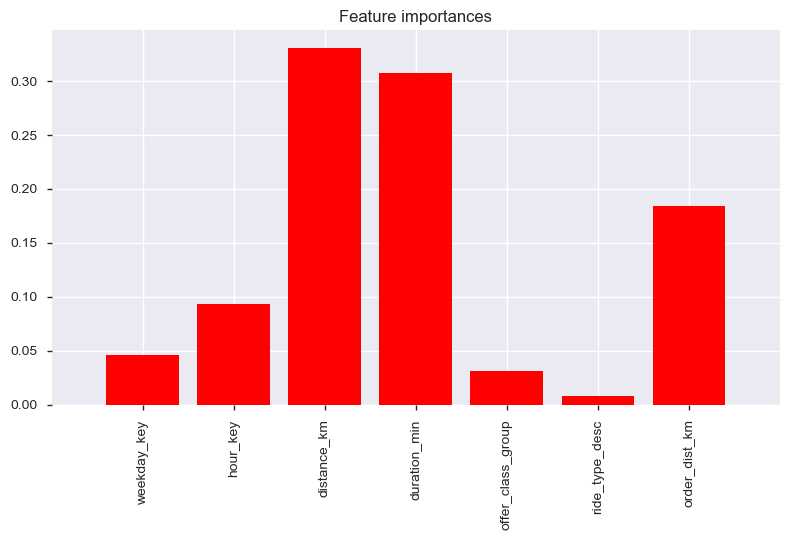

In [34]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
            'criterion': ['entropy', 'gini'],
            'max_depth': [10, 20, 100],
            'n_estimators': [10, 20, 100]
        }

importances = clf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
 
names_indices = X_train.columns
 
plt.figure()
plt.title("Feature importances")
 
plt.bar(range(len(importances)), importances, color="r")
plt.xticks(range(len(importances)), names_indices, rotation=90)
 
plt.tight_layout()
plt.xlim([-1, len(importances)])
plt.show()